## Important libraries

In [1]:
#!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the traning and test data

In [3]:
#training data
df1 = pd.read_csv('Boston_Train.csv')
df1.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#testing data
df2 = pd.read_csv('Boston_Test.csv')
df2.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.07950,60,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,0.01709,90,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,0.10659,80,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


## finding information on training data

In [5]:
#checking for data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     351 non-null    float64
 1   zn       351 non-null    float64
 2   indus    351 non-null    float64
 3   chas     351 non-null    int64  
 4   nox      351 non-null    float64
 5   rm       351 non-null    float64
 6   age      351 non-null    float64
 7   dis      351 non-null    float64
 8   rad      351 non-null    int64  
 9   tax      351 non-null    int64  
 10  ptratio  351 non-null    float64
 11  black    351 non-null    float64
 12  lstat    351 non-null    float64
 13  medv     351 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.5 KB


In [6]:
#discriptive statistics
df1.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.401659,15.327635,8.435670,0.076923,0.510737,6.403900,60.817949,4.420862,4.472934,310.344729,17.707692,380.489174,10.407692,25.062678
std,0.641716,25.605040,6.088947,0.266850,0.102256,0.676424,28.393094,1.968666,1.615543,67.577707,2.198252,40.455904,5.888639,8.461918
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.057845,0.000000,4.025000,0.000000,0.437450,5.949500,36.150000,2.768500,4.000000,264.000000,16.100000,383.670000,6.095000,19.500000
50%,0.132620,0.000000,6.200000,0.000000,0.493000,6.266000,62.000000,4.095200,4.000000,304.000000,17.900000,392.690000,9.380000,22.900000
75%,0.404865,22.000000,10.010000,0.000000,0.544000,6.733000,88.450000,5.871800,5.000000,358.000000,19.100000,396.220000,13.210000,28.700000
max,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


In [7]:
#checking for nul values
df1.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

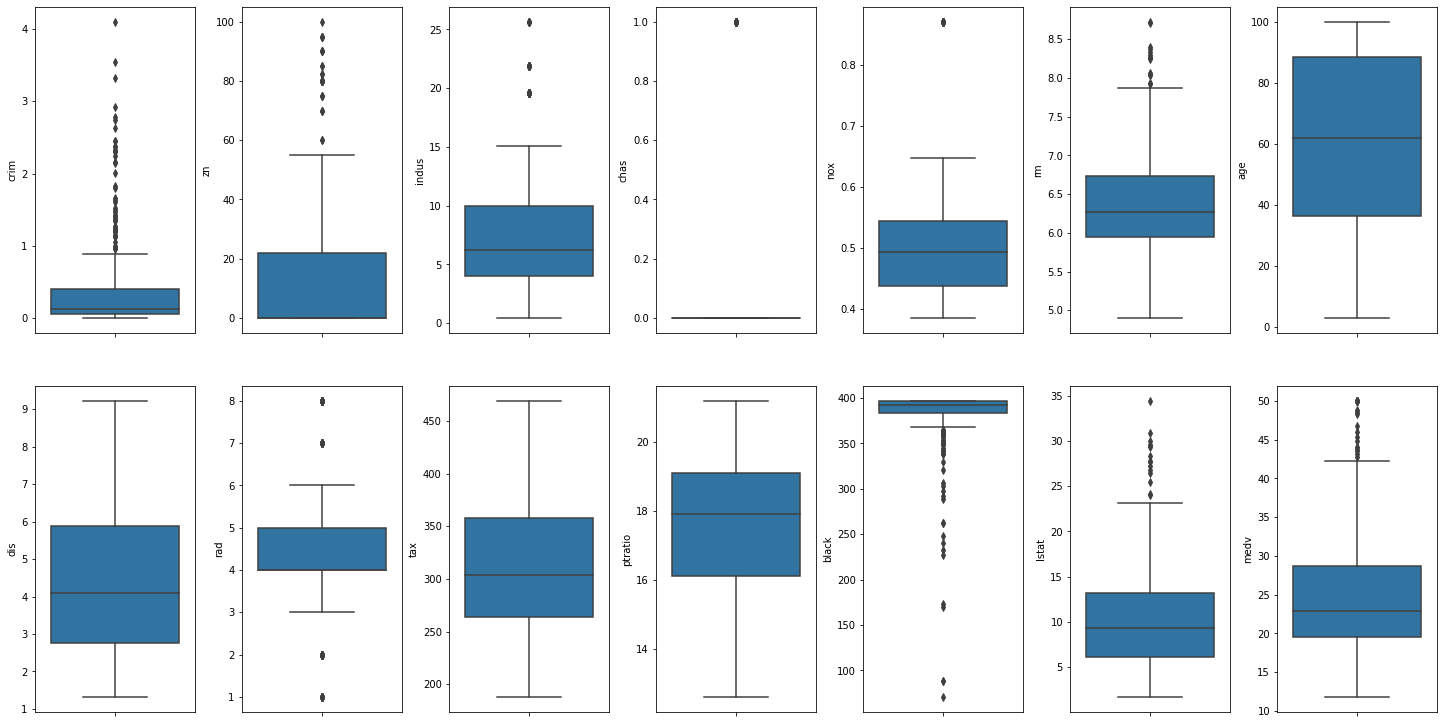

In [8]:
#Creating boxplot 
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
#creating the plot for each index
index = 0
ax = ax.flatten()

for col, value in df1.items():
    sns.boxplot(y=col, data=df1, ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

crims , zn, black has high outlyers(it will not follow the uniform distribution)
we will have to convert in min-max transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

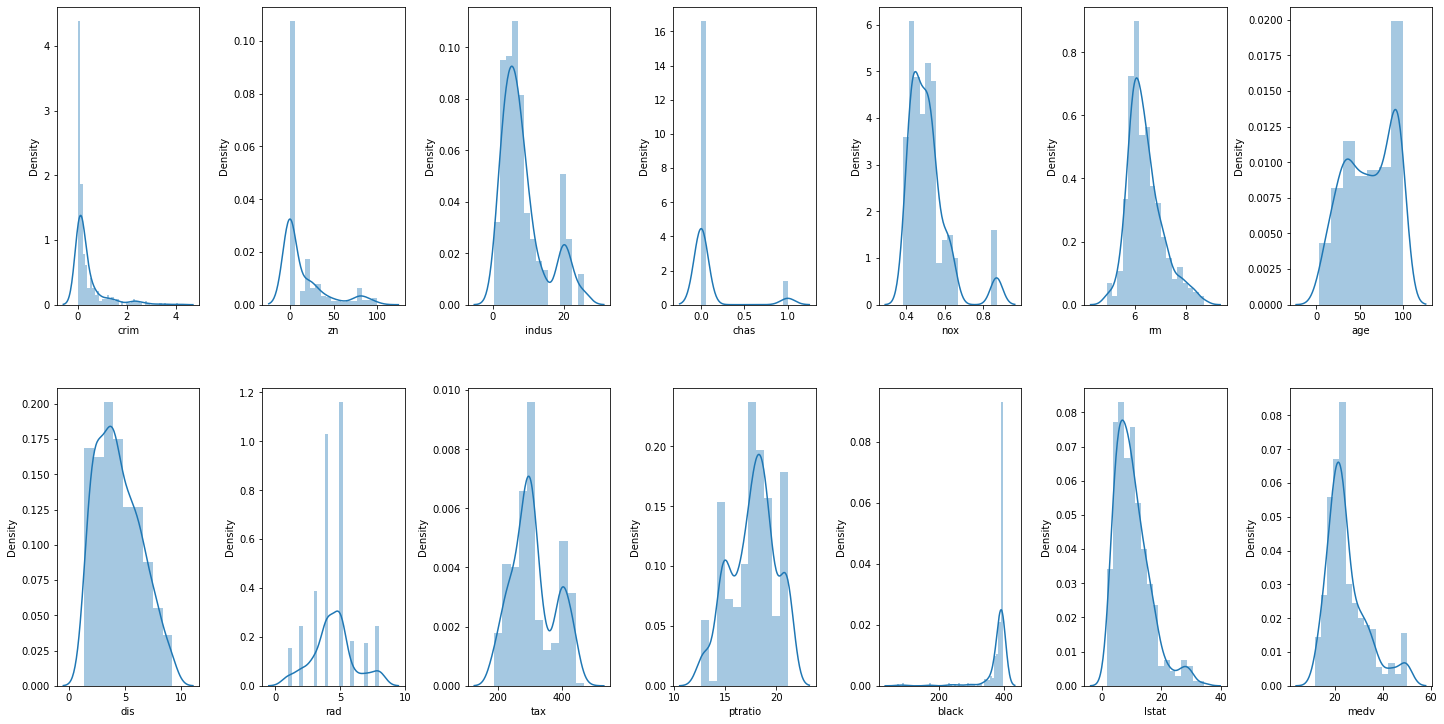

In [9]:
#creating displot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
#creating the plot for each index
index = 0
ax = ax.flatten()

for col, value in df1.items():
    sns.distplot(value, ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Min-Max Normalization

In [10]:
cols = ['crim','zn','tax','black']

for col in cols:
    #find min-max of the columns
    minimum = min(df1[col])
    maximum = max(df1[col])
    df1[col] = (df1[col]- minimum) / (maximum - minimum)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

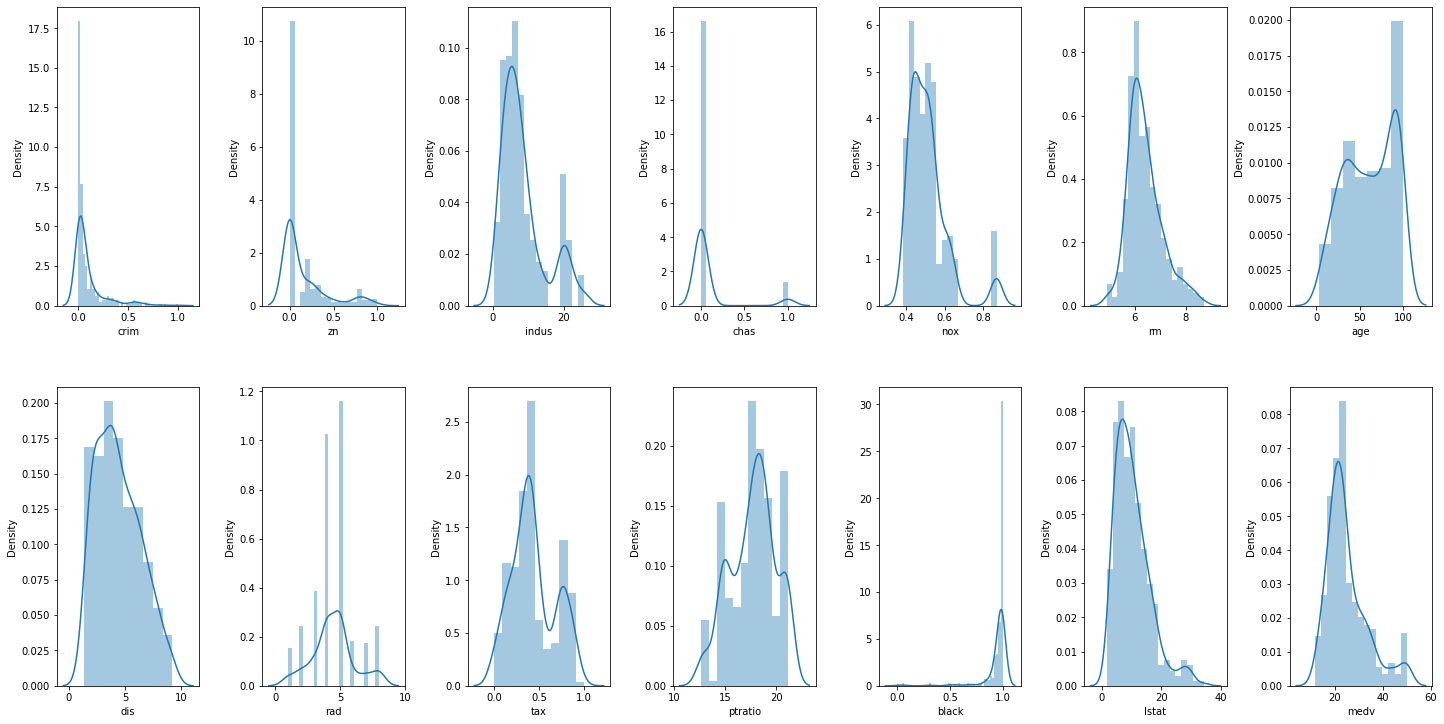

In [11]:
#creating displot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
#creating the plot for each index
index = 0
ax = ax.flatten()

for col, value in df1.items():
    sns.distplot(value, ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

all the four columns are in the range of 0 to 1
if we starnderdize the 4 columns the it will convert in to uniform distribution

In [12]:
#Standerdizations
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

#fit the data
scaled_cols = scaler.fit_transform(df1[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.616945,0.104518,-0.212573,0.406226
1,-0.584189,-0.599472,-1.012794,0.406226
2,-0.584220,-0.599472,-1.012794,0.305479
3,-0.576293,-0.599472,-1.309172,0.350036
4,-0.519052,-0.599472,-1.309172,0.406226


In [13]:
#updating 4 columns in original dataset
for col in cols:
    df1[col] = scaled_cols[col]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

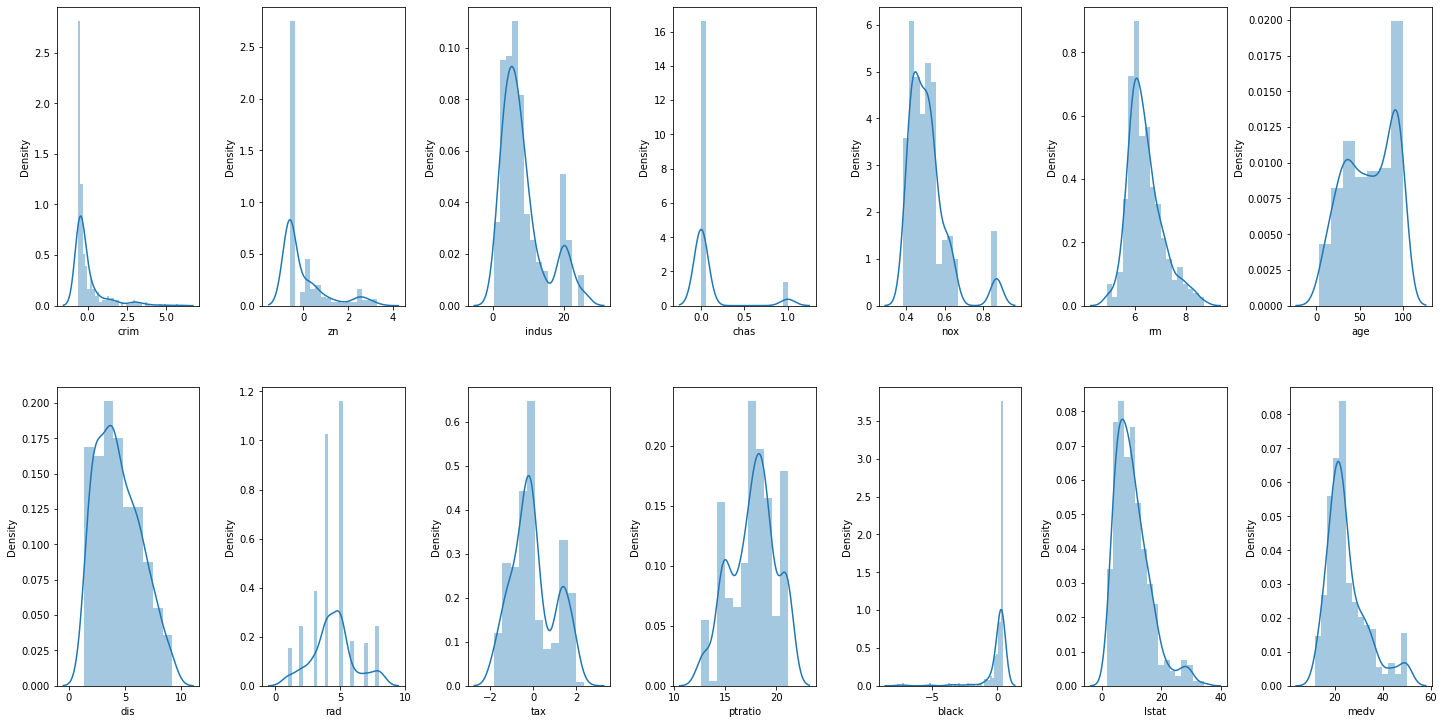

In [14]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
#creating the plot for each index
index = 0
ax = ax.flatten()

for col, value in df1.items():
    sns.distplot(value, ax=ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## coorelation matrix

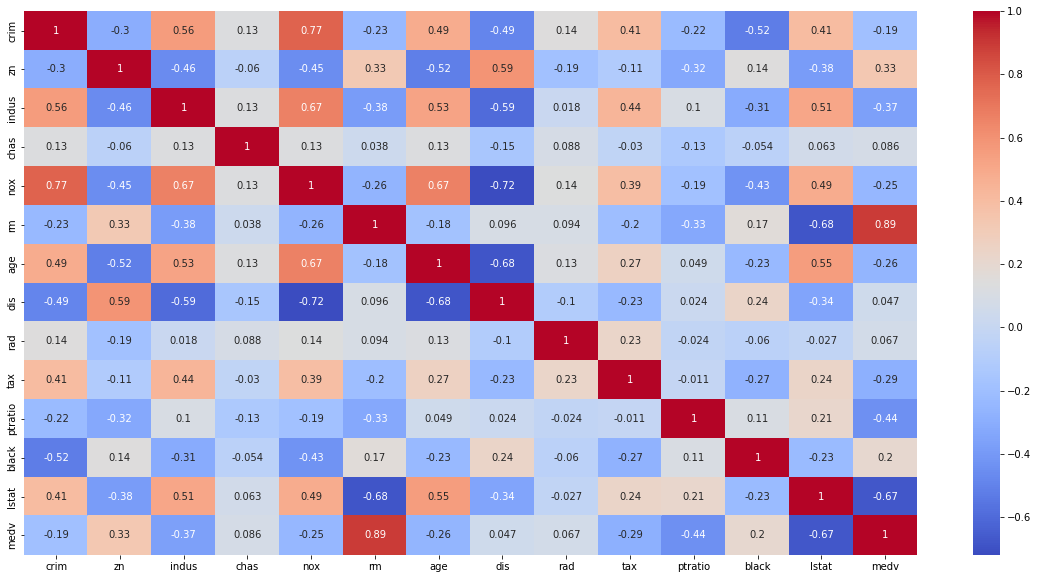

In [15]:
plt.figure(figsize=(20,10))
cor = df1.corr()
sns.heatmap(cor,annot=True, cmap='coolwarm');

Target variable - 'rm' is highly coorelated with 'medv'

In [16]:
#finding correlation from heatmap
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
#tried different threshold
corr_features = correlation(df1,0.7)
len(set(corr_features))

2

In [18]:
corr_features

{'medv', 'nox'}

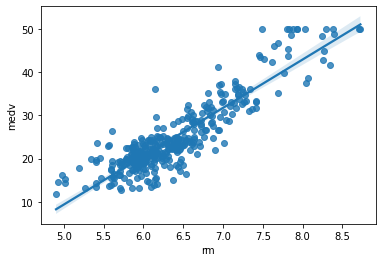

In [19]:
sns.regplot(y=df1['medv'], x=df1['rm']);

the price of medv increases rm increases

In [20]:
#training data
from sklearn import preprocessing

X_train = df1.drop(columns=['medv'], axis=1)
y_train = df1['medv']
normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(X_train)
normalized_train_X

#testting data
X_test = df2.drop(columns=['medv'], axis=1)
y_test = df2['medv']
normalizer = preprocessing.Normalizer()
normalized_X_test = normalizer.fit_transform(X_test)
normalized_X_test


array([[1.42366697e-04, 1.07446564e-01, 3.02641154e-03, ...,
        3.27712019e-02, 6.63983948e-01, 9.83136057e-03],
       [1.26611239e-04, 1.04868503e-01, 2.95379616e-03, ...,
        3.19848934e-02, 6.85717662e-01, 1.36154273e-02],
       [3.89302416e-05, 2.05015901e-01, 4.60146800e-03, ...,
        3.87252257e-02, 8.75782370e-01, 1.02507950e-02],
       ...,
       [1.23765824e-04, 0.00000000e+00, 2.43009593e-02, ...,
        4.27762066e-02, 8.08470305e-01, 1.14884669e-02],
       [2.24644719e-04, 0.00000000e+00, 2.44548909e-02, ...,
        4.30471676e-02, 8.06519433e-01, 1.32831260e-02],
       [9.69214289e-05, 0.00000000e+00, 2.43887924e-02, ...,
        4.29308164e-02, 8.11392431e-01, 1.61092778e-02]])

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [22]:
def train(model,X,y):
  #train the model
  model.fit(normalized_train_X, y_train)
  #predict the training set
  pred = model.predict(normalized_X_test)

  #perform cross-validation
  cv_score = cross_val_score(model, X, y , scoring='neg_mean_squared_error', cv=5)
  cv_score = np.abs(np.mean(cv_score))

  print('Model Report')
  print('MSE:', mean_squared_error(y_test, pred))
  print('cv score:', cv_score)

Model Report
MSE: 445.2735547128868
cv score: 24.573670732955613


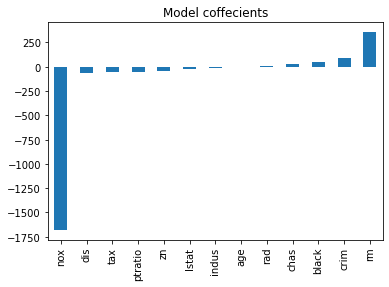

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, normalized_train_X, y_train)
coef = pd.Series(model.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Model coffecients');